<a href="https://colab.research.google.com/github/AdiraMartin/Assignment_Exploring-Machine-Learning-Models-with-Python_Supervised/blob/main/Seoul_Bike_Data_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Machine Learning Models with Python (Supervised)

unfinished

In [ ]:
!gdown --id 10W72mmFW_PjrZWdttjScg0pBykdNQo8L

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10W72mmFW_PjrZWdttjScg0pBykdNQo8L
To: /content/SeoulBikeData.csv
100% 604k/604k [00:00<00:00, 6.20MB/s]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding Data

In [ ]:
df = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.sample(2)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1749,11/02/2018,119,21,-5.6,69,2.2,1984,-10.3,0.0,0.0,0.0,Winter,No Holiday,Yes
1373,27/01/2018,25,5,-15.4,45,0.8,2000,-24.6,0.0,0.0,0.3,Winter,No Holiday,Yes


Data Dictionary:

1. Date : year-month-day
2. Rented Bike count - Count of bikes rented at each hour
3. Hour - Hour of the day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].nunique()

365

In [ ]:
365*24

8760

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(캜)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(캜)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [ ]:
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sort_values(ascending = True)

Holiday                        2
Functioning Day                2
Seasons                        4
Hour                          24
Snowfall (cm)                 51
Rainfall(mm)                  61
Wind speed (m/s)              65
Humidity(%)                   90
Solar Radiation (MJ/m2)      345
Date                         365
Temperature(캜)               546
Dew point temperature(캜)     556
Visibility (10m)            1789
Rented Bike Count           2166
dtype: int64

In [ ]:
df = df.rename(columns = {'Temperature(캜)' : 'Temperature',
                          'Humidity(%)' : 'Humidity',
                          'Wind speed (m/s)' : 'Wind speed',
                          'Snowfall (cm)' : 'Snowfall',
                          'Rainfall(mm)' : 'Rainfall',
                          'Dew point temperature(캜)': 'Drew point temperature',
                          'Visibility (10m)' : 'Visibility',
                          'Solar Radiation (MJ/m2)' : 'Solar Radiation'})

In [ ]:
numcol = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
catscol = df.select_dtypes(exclude = ['int64', 'float64']).columns.tolist()

print(numcol)
print(catscol)

['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Drew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']
['Date', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
for col in catscol:
    print(f'value counts in columns {col}:')
    print(df[col].value_counts())
    print ('----'*8)
    print('\n')

value counts in columns Date:
2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64
--------------------------------


value counts in columns Seasons:
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
--------------------------------


value counts in columns Holiday:
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
--------------------------------


value counts in columns Functioning Day:
Yes    8465
No      295
Name: Functioning Day, dtype: int64
--------------------------------




In [ ]:
df = df[df['Functioning Day'] == 'Yes']
df = df.drop('Functioning Day', axis=1)

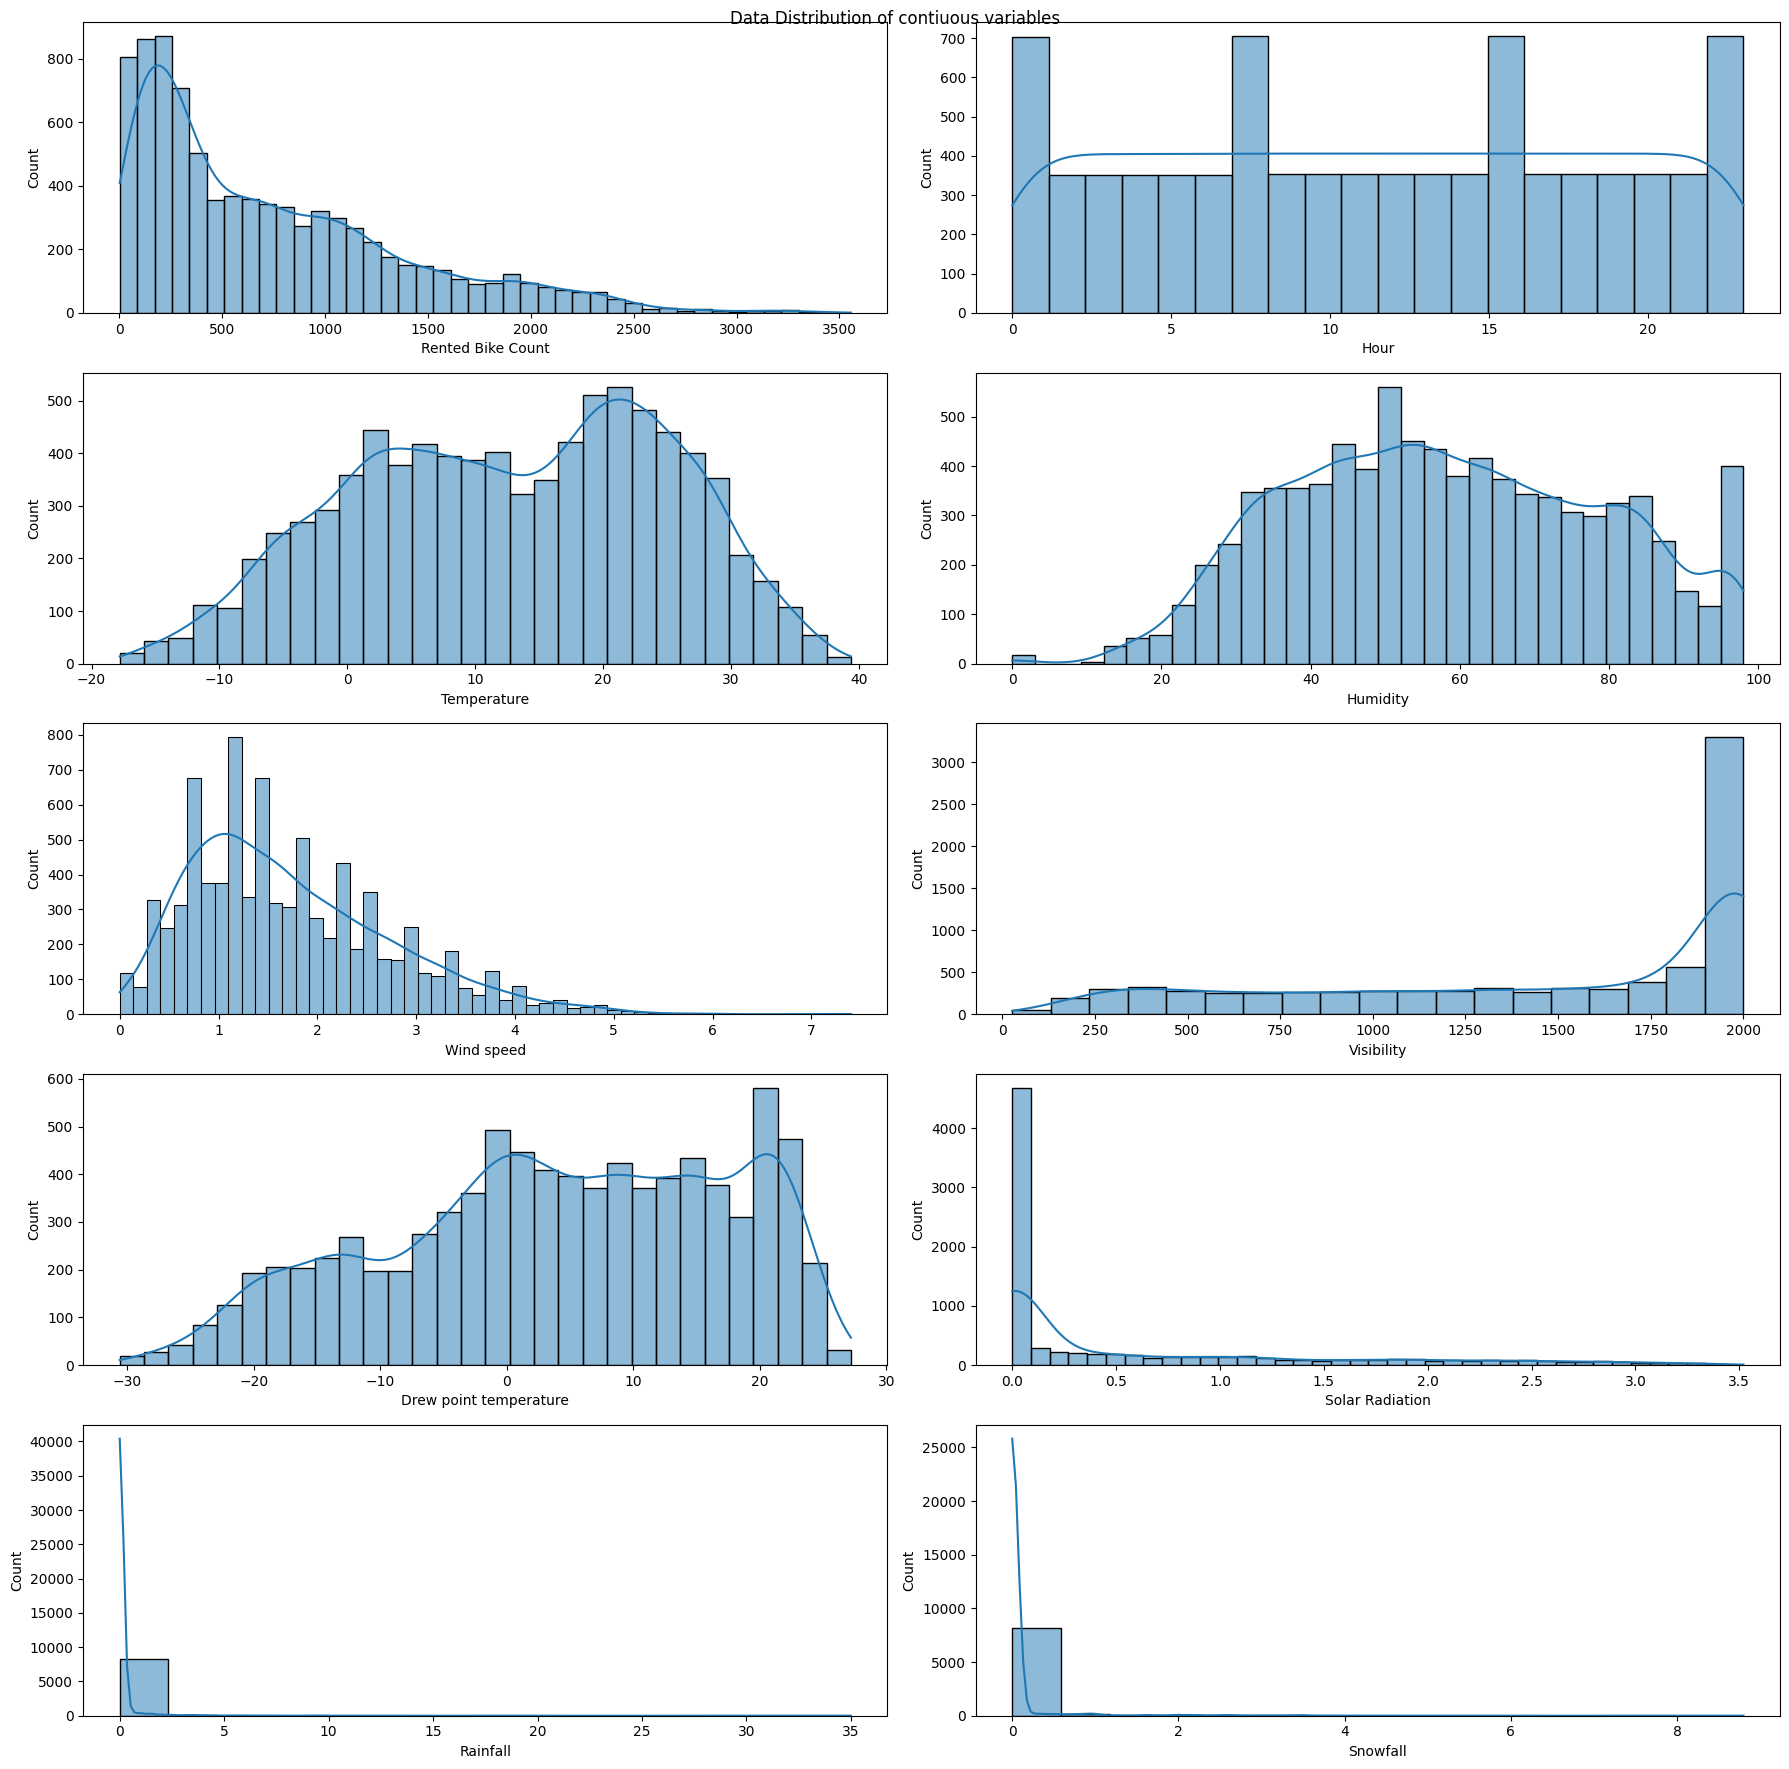

In [ ]:
plt.figure(figsize = (18,18))
for i, col in enumerate (df.select_dtypes(include =['float64', 'int64'])):
  ax = plt.subplot(5,2, i+1)
  sns.histplot(data = df, x=col, ax = ax, kde=True)

plt.suptitle('Data Distribution of contiuous variables')
plt.tight_layout()

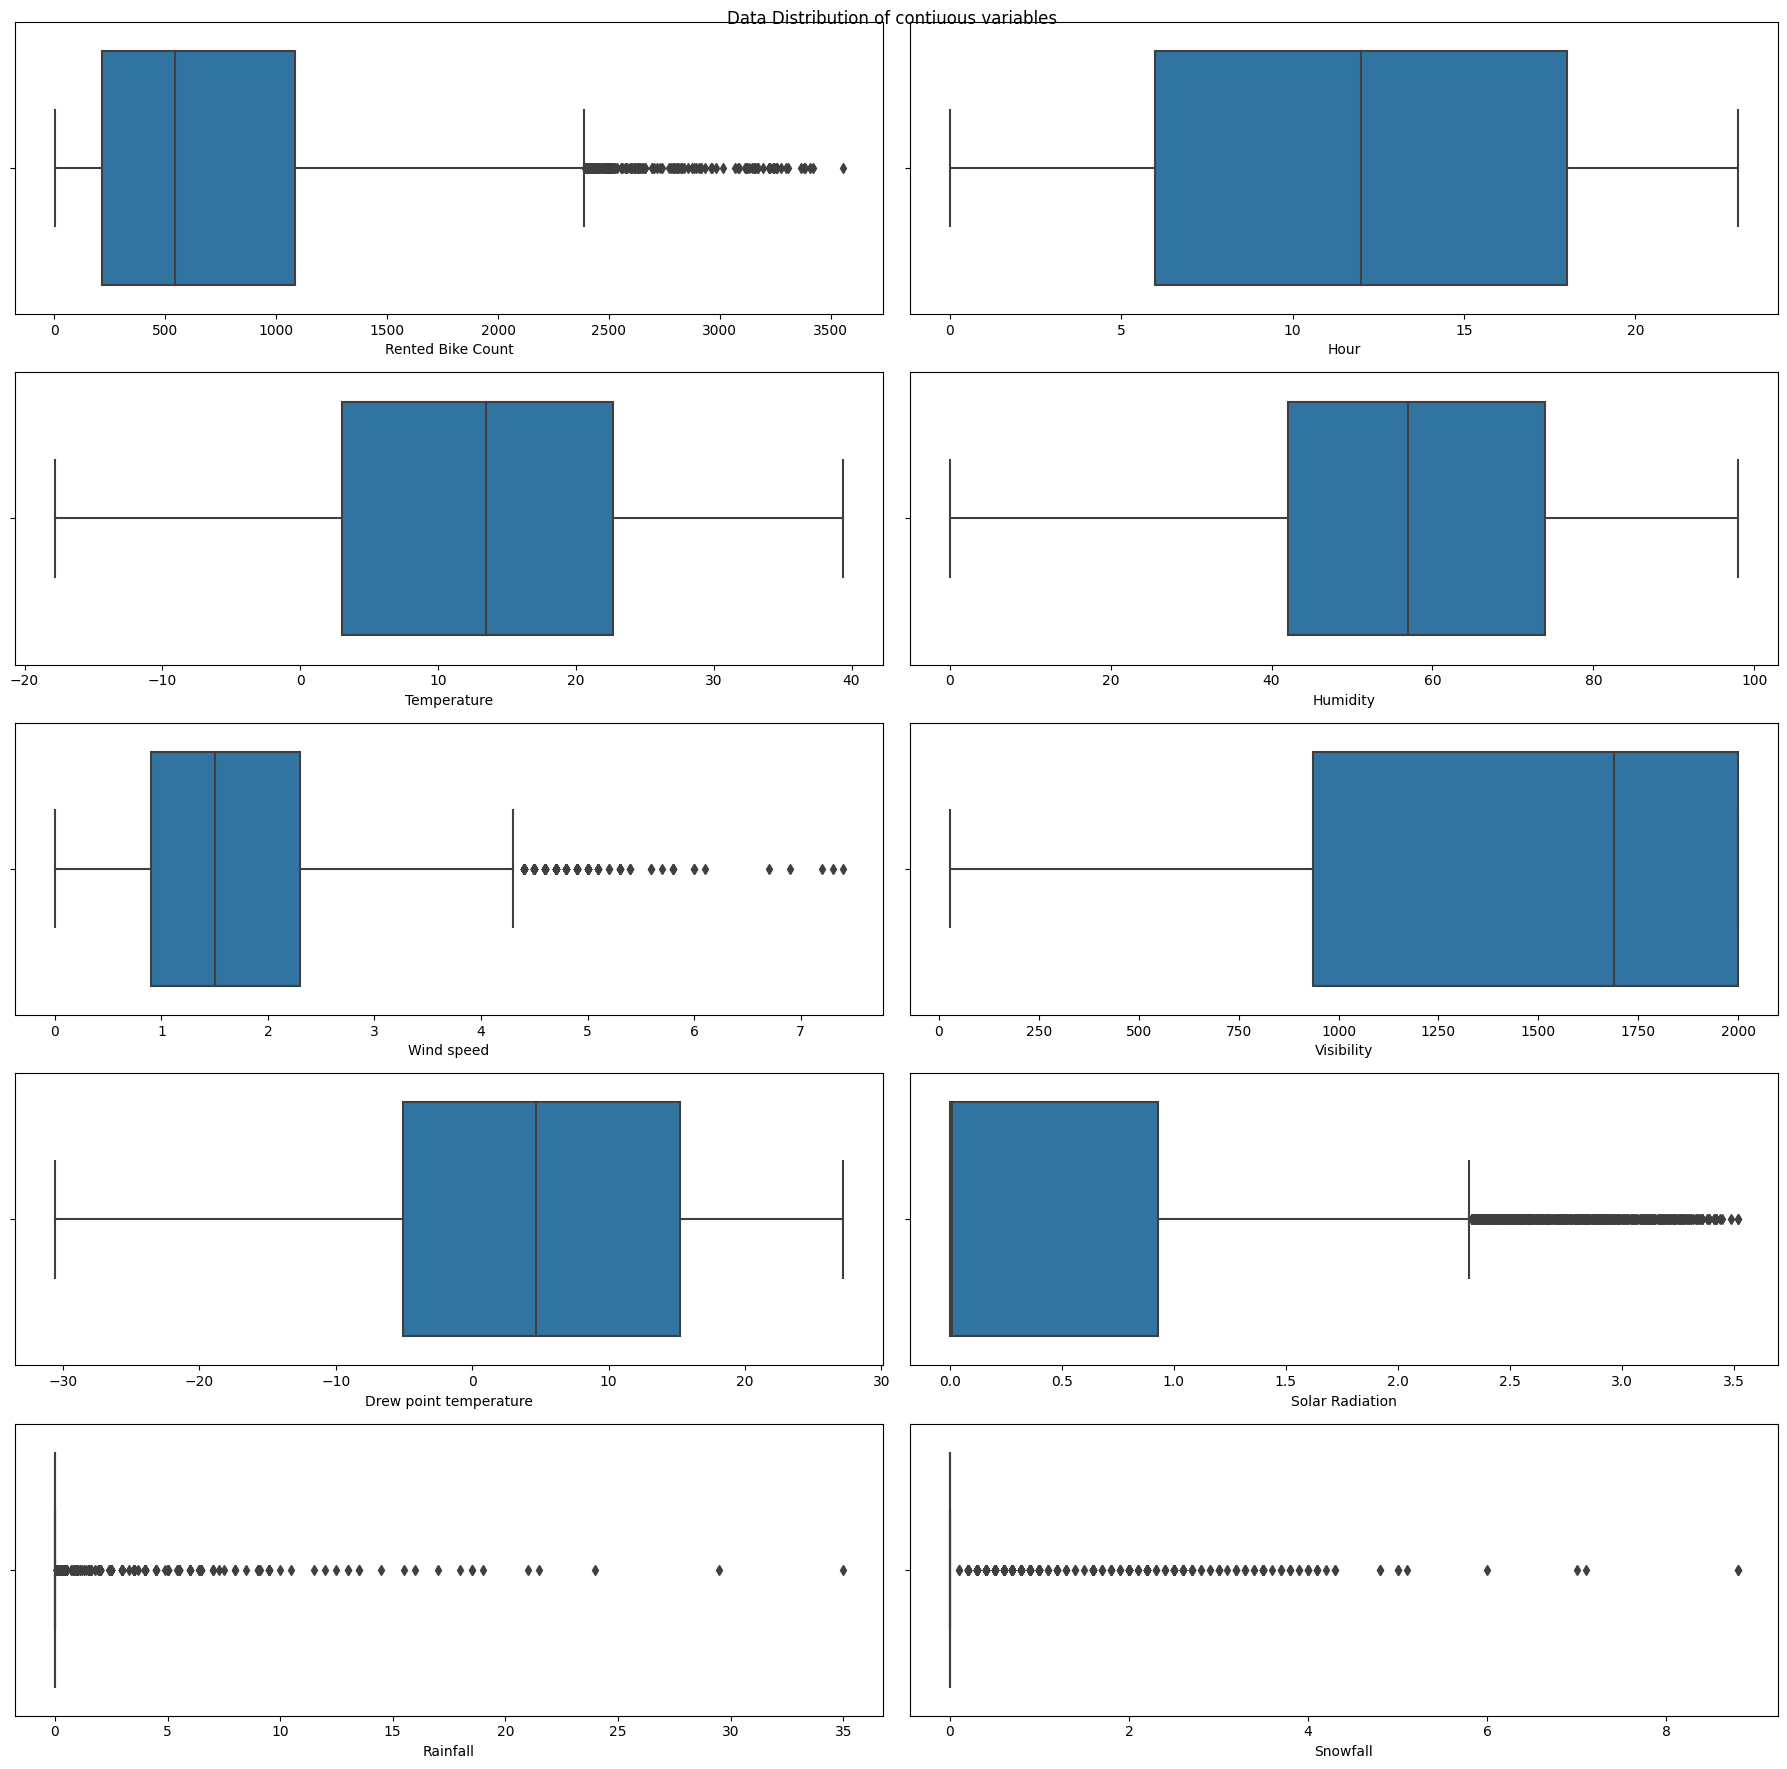

In [ ]:
plt.figure(figsize = (18,18))
for i, col in enumerate (df.select_dtypes(include =['float64', 'int64'])):
  ax = plt.subplot(5,2, i+1)
  sns.boxplot(data = df, x=col, ax = ax)

plt.suptitle('Data Distribution of contiuous variables')
plt.tight_layout()

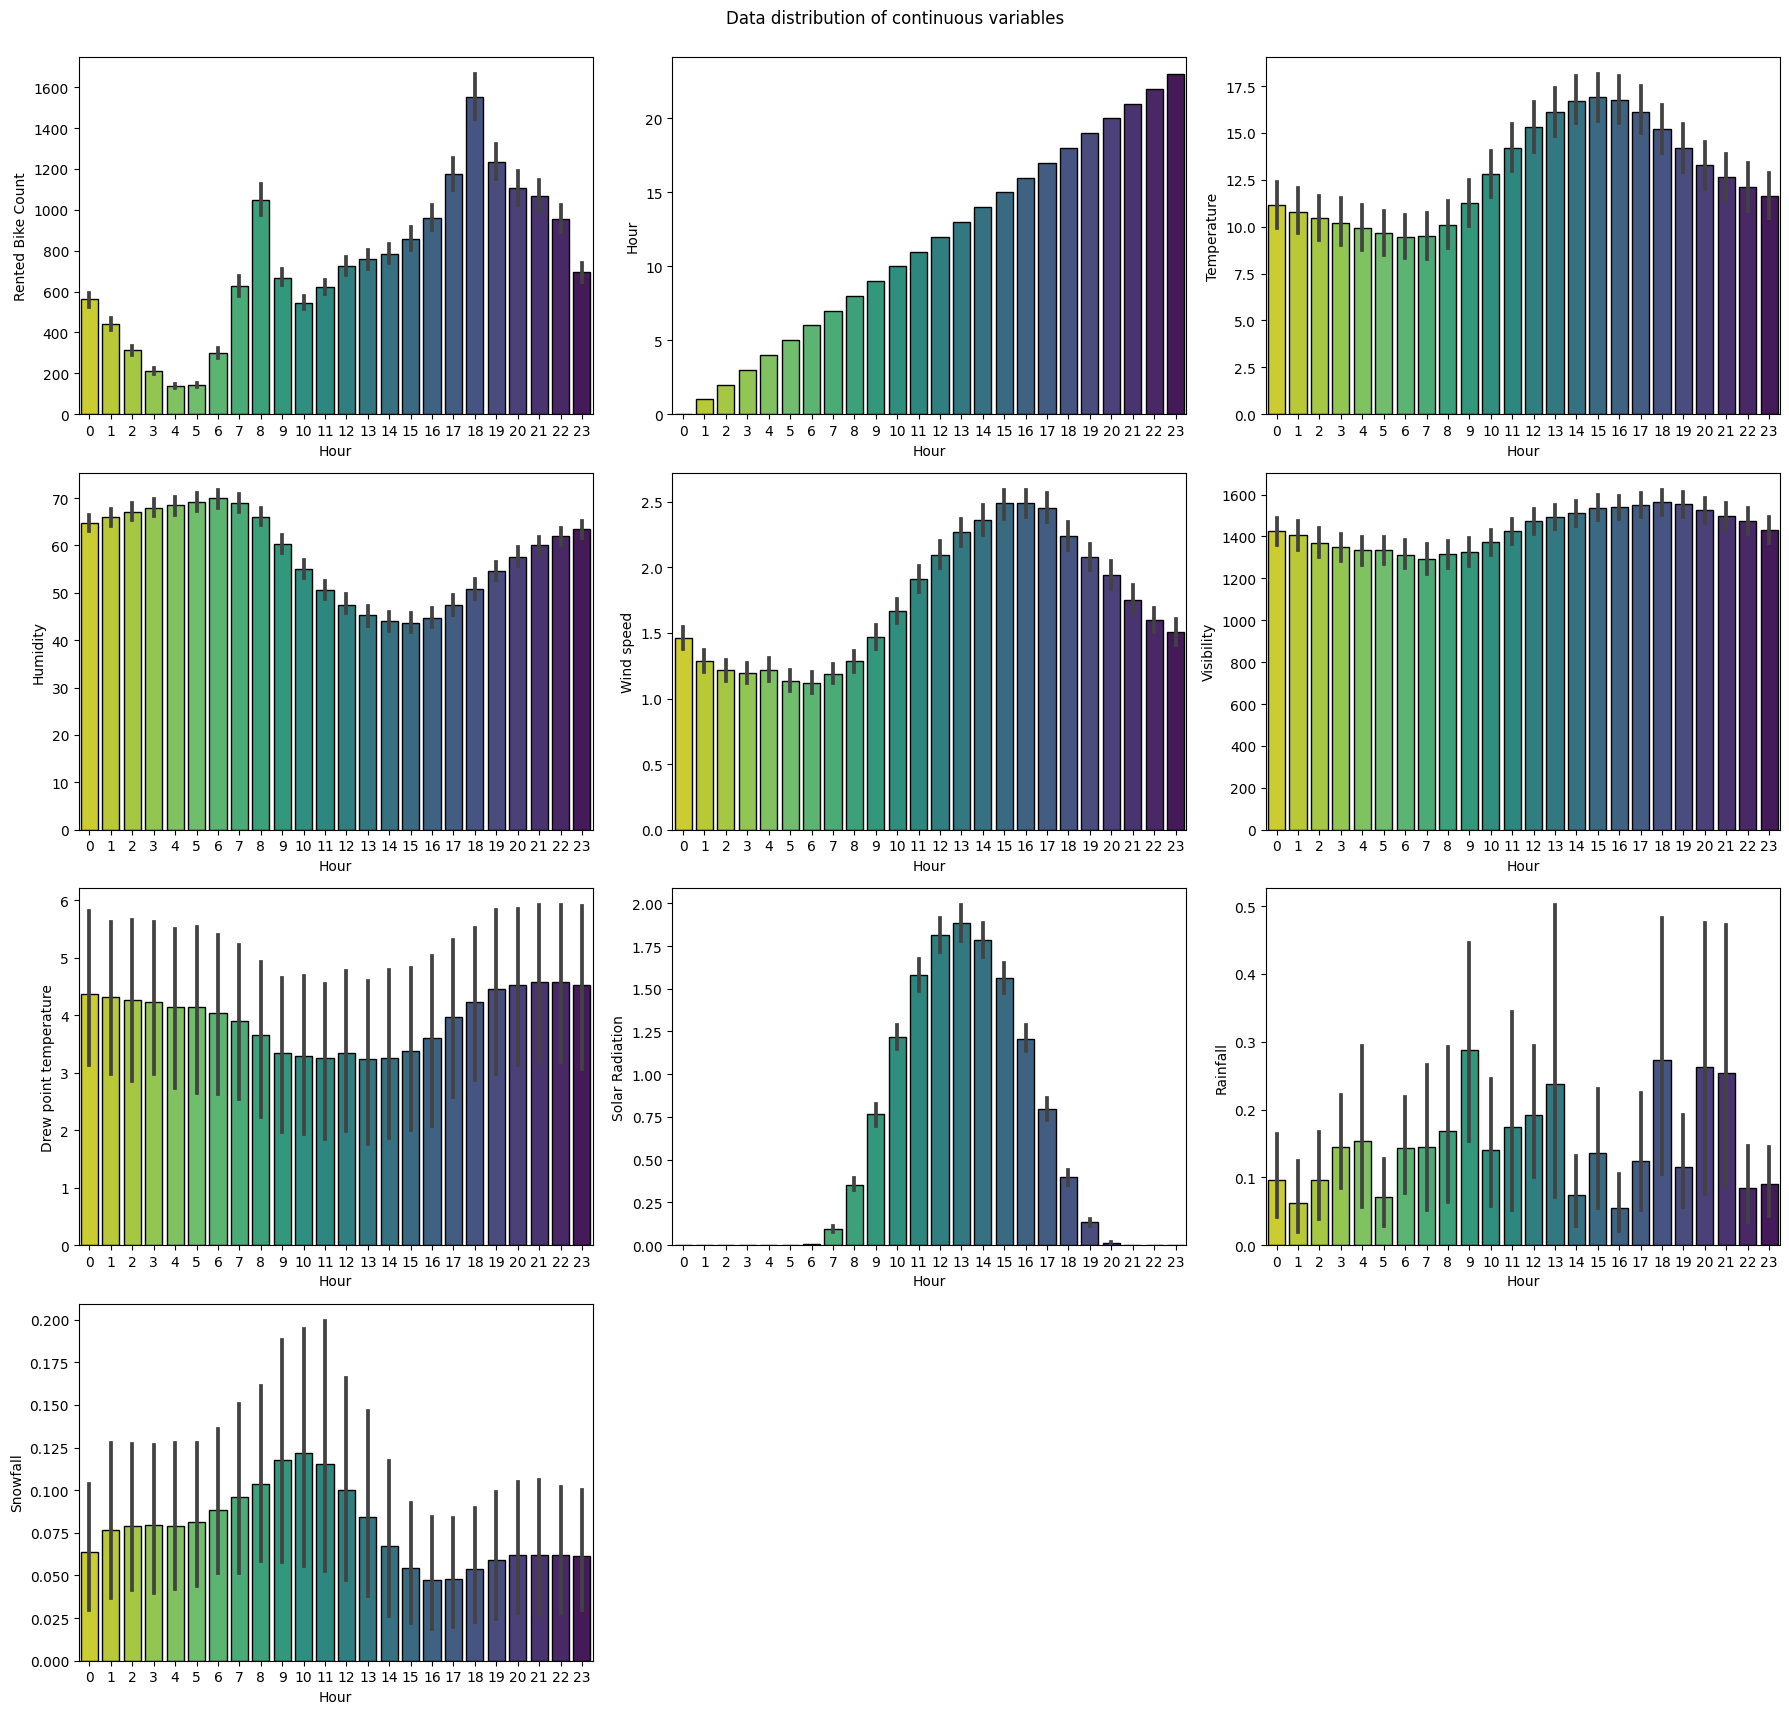

In [ ]:
plt.figure(figsize=(18,18))
for i,col in enumerate (numcol):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3,i+1)
    sns.barplot(data=df, x ='Hour', y = col, ax =ax, edgecolor="black", palette='viridis_r')
plt.suptitle('Data distribution of continuous variables', y = 0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    8465 non-null   datetime64[ns]
 1   Rented Bike Count       8465 non-null   int64         
 2   Hour                    8465 non-null   int64         
 3   Temperature             8465 non-null   float64       
 4   Humidity                8465 non-null   int64         
 5   Wind speed              8465 non-null   float64       
 6   Visibility              8465 non-null   int64         
 7   Drew point temperature  8465 non-null   float64       
 8   Solar Radiation         8465 non-null   float64       
 9   Rainfall                8465 non-null   float64       
 10  Snowfall                8465 non-null   float64       
 11  Seasons                 8465 non-null   object        
 12  Holiday                 8465 non-null   object  

### EDA

In [ ]:
cek = df[['Date', 'Rented Bike Count', 'Hour', 'Holiday', 'Solar Radiation', 'Temperature']]

In [ ]:
cek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8465 non-null   datetime64[ns]
 1   Rented Bike Count  8465 non-null   int64         
 2   Hour               8465 non-null   int64         
 3   Holiday            8465 non-null   object        
 4   Solar Radiation    8465 non-null   float64       
 5   Temperature        8465 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 462.9+ KB


In [ ]:
cek['day_name'] = cek['Date'].dt.day_name()

In [ ]:
cek['is_weekend'] = cek['day_name'].apply(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

In [ ]:
cek['Holiday'] = cek['Holiday'].map({'Holiday' : 1, 'No Holiday': 0})

In [ ]:
# Check if either 'holiday' or 'is_weekend' column has a value of 1
cek['libur'] = ((cek['Holiday'] == 1) | (cek['is_weekend'] == 1)).astype(int)

# Check if both 'holiday' and 'is_weekend' columns have a value of 1
cek.loc[(cek['Holiday'] == 1) & (cek['is_weekend'] == 1), 'libur'] = 1

# Fill all other cases with 0
cek.loc[(cek['libur'] != 1), 'libur'] = 0

In [ ]:
cek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8465 non-null   datetime64[ns]
 1   Rented Bike Count  8465 non-null   int64         
 2   Hour               8465 non-null   int64         
 3   Holiday            8465 non-null   int64         
 4   Solar Radiation    8465 non-null   float64       
 5   Temperature        8465 non-null   float64       
 6   day_name           8465 non-null   object        
 7   is_weekend         8465 non-null   int64         
 8   libur              8465 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 661.3+ KB


<Axes: xlabel='Hour', ylabel='rented_bike'>

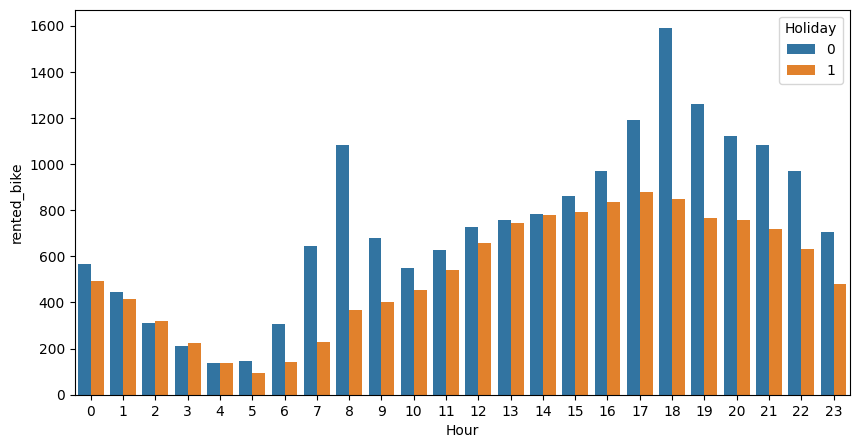

In [ ]:
hourly_count_by_holiday = cek.groupby(['Hour', 'Holiday']).agg(rented_bike = ('Rented Bike Count', 'mean')).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='rented_bike', hue='Holiday', data=hourly_count_by_holiday )

<Axes: xlabel='Hour', ylabel='rented_bike'>

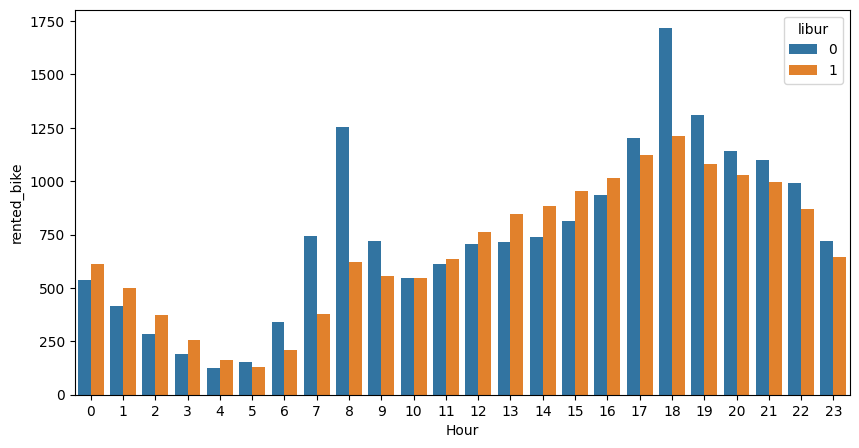

In [ ]:
hourly_count_by_libur = cek.groupby(['Hour', 'libur']).agg(rented_bike = ('Rented Bike Count', 'mean')).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='rented_bike', hue='libur', data=hourly_count_by_libur )

In [ ]:
rented_each_day = cek.groupby(['Date']).agg( ranted_each_day = ('Rented Bike Count', 'sum')).reset_index()
rented_each_day.head()

,Date,ranted_each_day
0,2017-01-12,9539
1,2017-02-12,8523
2,2017-03-12,7222
3,2017-04-12,8729
4,2017-05-12,8307


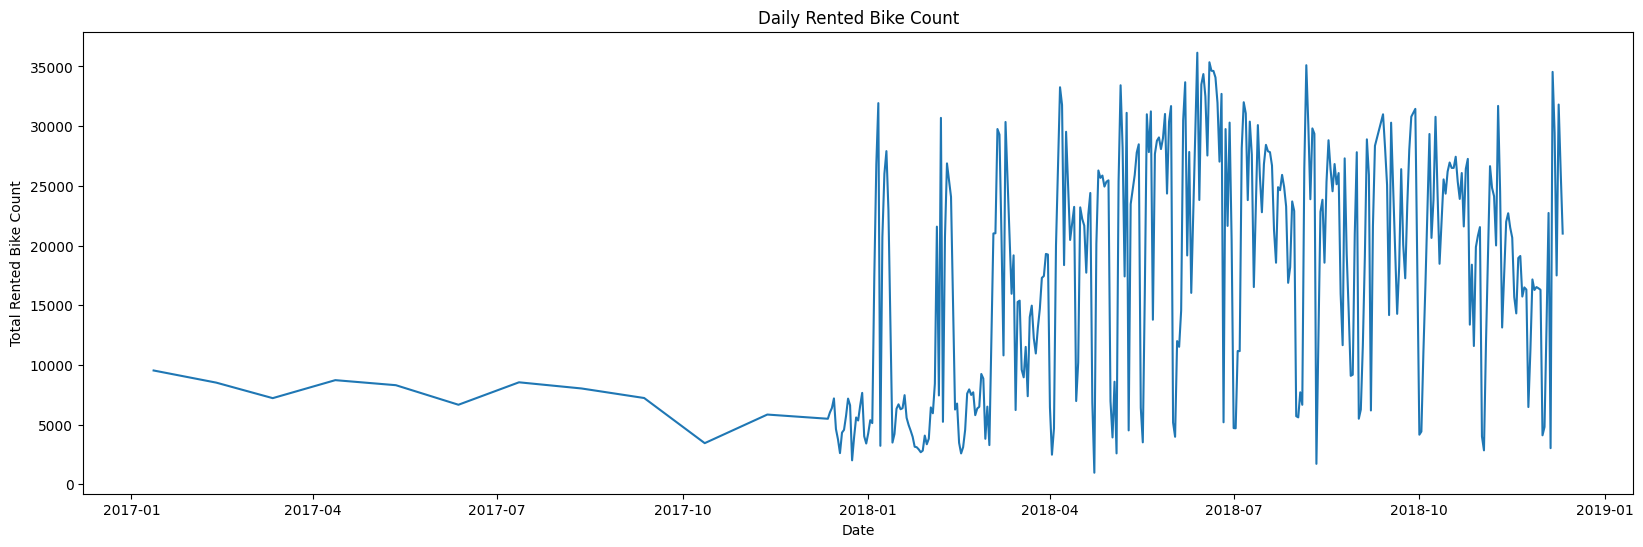

In [ ]:
plt.figure(figsize=(20, 6))
# Create the line plot
plt.plot(rented_each_day['Date'], rented_each_day['ranted_each_day'])

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Total Rented Bike Count')

# Set the plot title
plt.title('Daily Rented Bike Count')

# Show the plot
plt.show()

In [ ]:
def get_time_label(hour):
    if (hour >= 22 and hour <= 23) or (hour >= 0 and hour <= 3):
        return 'Night Hour'
    elif hour >= 4 and hour <= 9:
        return 'Ealy/Morning Commute'
    elif hour >= 10 and hour <= 15:
        return 'Afternoon'
    elif hour >= 16 and hour <= 21:
        return 'Evening Commute/ After Work'
    else:
        return 'Other'


cek['Time Agg'] = cek['Hour'].apply(get_time_label)


In [ ]:
cek

,Date,Rented Bike Count,Hour,Holiday,Solar Radiation,Temperature,day_name,is_weekend,libur,Time Agg
0,2017-01-12,254,0,0,0.0,-5.2,Thursday,0,0,Night Hour
1,2017-01-12,204,1,0,0.0,-5.5,Thursday,0,0,Night Hour
2,2017-01-12,173,2,0,0.0,-6.0,Thursday,0,0,Night Hour
3,2017-01-12,107,3,0,0.0,-6.2,Thursday,0,0,Night Hour
4,2017-01-12,78,4,0,0.0,-6.0,Thursday,0,0,Ealy/Morning Commute
...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,0,0.0,4.2,Friday,0,0,Evening Commute/ After Work
8756,2018-11-30,764,20,0,0.0,3.4,Friday,0,0,Evening Commute/ After Work
8757,2018-11-30,694,21,0,0.0,2.6,Friday,0,0,Evening Commute/ After Work
8758,2018-11-30,712,22,0,0.0,2.1,Friday,0,0,Night Hour


In [ ]:
time_agg = cek.groupby(['Time Agg', 'libur']).agg(rented_count = ('Rented Bike Count', 'sum')).reset_index()
time_agg

,Time Agg,libur,rented_count
0,Afternoon,0,986588
1,Afternoon,1,527933
2,Ealy/Morning Commute,0,798220
3,Ealy/Morning Commute,1,233609
4,Evening Commute/ After Work,0,1771126
5,Evening Commute/ After Work,1,735555
6,Night Hour,0,749679
7,Night Hour,1,369604


<Axes: xlabel='Time Agg', ylabel='rented_count'>

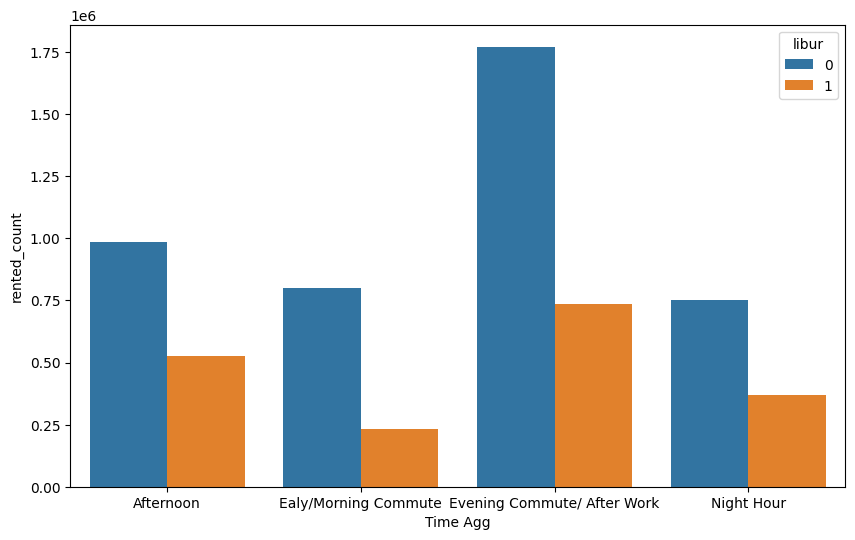

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Time Agg', y='rented_count', hue='libur', data=time_agg )

#### Solar

In [ ]:
cek_solar = cek[['Solar Radiation', 'Rented Bike Count']].groupby(['Rented Bike Count']).sum().reset_index()
cek_solar.head()

,Rented Bike Count,Solar Radiation
0,2,0.15
1,3,0.00
2,4,0.11
3,5,0.05
4,6,0.13


In [ ]:
bins = [0, 1, 2, 3, 3.52]

# Define the labels for the bins
labels = ['0', '1', '2', '3']

# Group data by solar radiation range
cek['Solar Radiation Range'] = pd.cut(cek['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
cek

,Date,Rented Bike Count,Hour,Holiday,Solar Radiation,Temperature,day_name,is_weekend,libur,Time Agg,Solar Radiation Range
0,2017-01-12,254,0,0,0.0,-5.2,Thursday,0,0,Night Hour,0
1,2017-01-12,204,1,0,0.0,-5.5,Thursday,0,0,Night Hour,0
2,2017-01-12,173,2,0,0.0,-6.0,Thursday,0,0,Night Hour,0
3,2017-01-12,107,3,0,0.0,-6.2,Thursday,0,0,Night Hour,0
4,2017-01-12,78,4,0,0.0,-6.0,Thursday,0,0,Ealy/Morning Commute,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,0,0.0,4.2,Friday,0,0,Evening Commute/ After Work,0
8756,2018-11-30,764,20,0,0.0,3.4,Friday,0,0,Evening Commute/ After Work,0
8757,2018-11-30,694,21,0,0.0,2.6,Friday,0,0,Evening Commute/ After Work,0
8758,2018-11-30,712,22,0,0.0,2.1,Friday,0,0,Night Hour,0


In [ ]:
cek_solar_range = cek.groupby(['Solar Radiation Range']).agg(rent_count = ('Rented Bike Count', 'sum')).reset_index()
cek_solar_range.head()

,Solar Radiation Range,rent_count
0,0,4167262
1,1,1109685
2,2,730064
3,3,165303


<Axes: xlabel='Solar Radiation Range', ylabel='rent_count'>

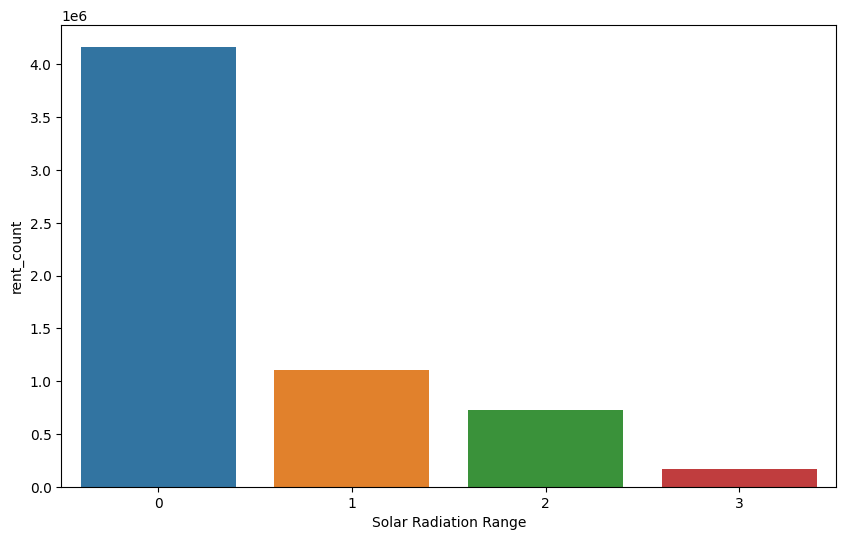

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Solar Radiation Range', y='rent_count', data=cek_solar_range )

<Axes: xlabel='Rented Bike Count', ylabel='Solar Radiation'>

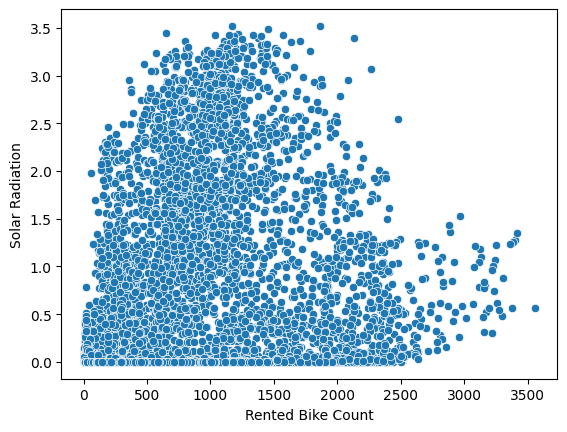

In [ ]:
sns.scatterplot(x="Rented Bike Count", y="Solar Radiation",
            data=cek)
            #hue="Time Agg")

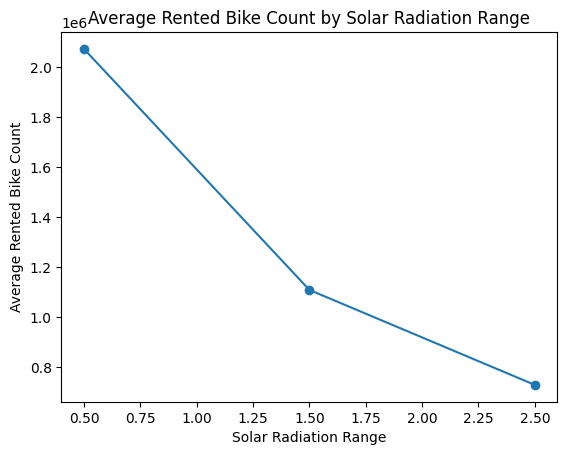

In [ ]:
# Define the bins for solar radiation ranges
bins = [0, 1, 2, 3]

# Group data by solar radiation range and calculate the mean rented bike count
cek['Solar Radiation Range'] = pd.cut(cek['Solar Radiation'], bins)
cek['Solar Radiation Range'] = cek['Solar Radiation Range'].apply(lambda x: x.mid)
grouped_data = cek.groupby('Solar Radiation Range')['Rented Bike Count'].sum()

# Create line plot
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Solar Radiation Range')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Solar Radiation Range')
plt.show()

<Axes: xlabel='Hour', ylabel='Solar Radiation'>

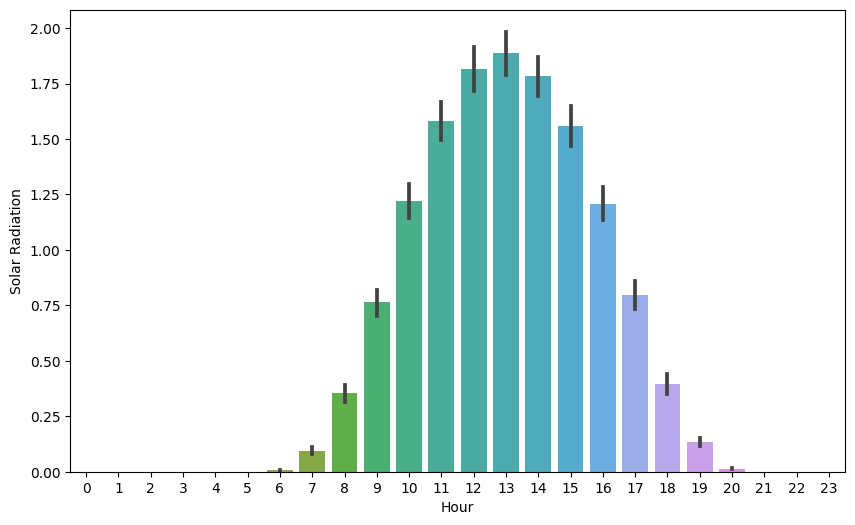

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour', y='Solar Radiation', data=cek )

#### Temperature

In [ ]:
cek['Temperature'] = cek['Temperature'].astype(int)

In [ ]:
cek_temperature = cek.sort_values('Temperature')
cek_temperature = cek.groupby(['Temperature']).agg(rent_count = ('Rented Bike Count', 'sum')).reset_index()
cek_temperature.head()

,Temperature,rent_count
0,-17,677
1,-16,1452
2,-15,2685
3,-14,1705
4,-13,3594


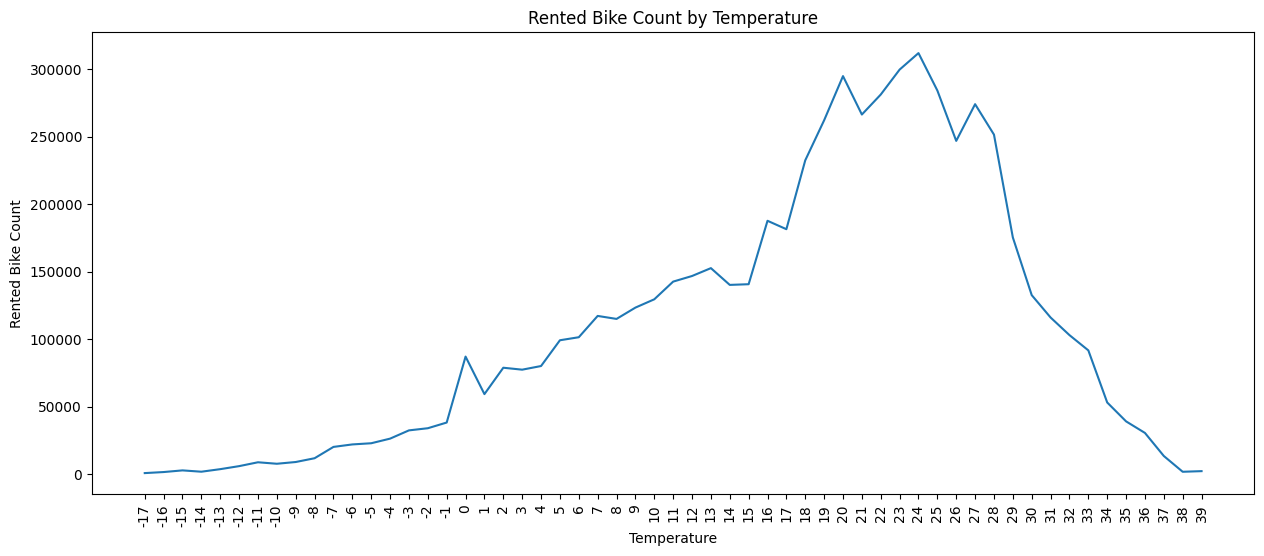

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(cek_temperature['Temperature'], cek_temperature['rent_count'])
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Temperature')

plt.xticks(cek_temperature['Temperature'], cek_temperature['Temperature'], rotation=90)

plt.show()


In [ ]:
def group_temp(Temperature):
    if Temperature <= -1 or Temperature >= 35:
        return 1
    elif 0 <= Temperature <= 15 or 29 <= Temperature <= 34:
        return 2
    elif 16 <= Temperature <= 32:
        return 3
    else:
        return 'Other'


In [ ]:
cek['Temperature_code'] = cek['Temperature'].apply(group_temp)

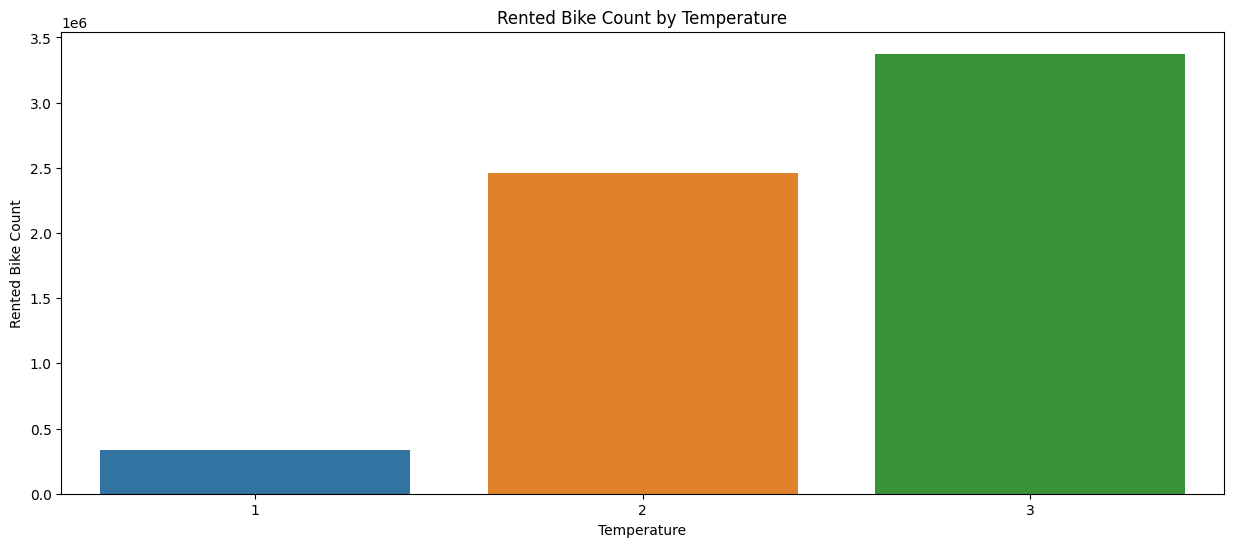

In [ ]:
cek_temperature_bycode = cek.groupby(['Temperature_code']).agg(rent_count = ('Rented Bike Count', 'sum')).reset_index()


plt.figure(figsize=(15, 6))
sns.barplot(x='Temperature_code', y= 'rent_count', data=cek_temperature_bycode )
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Temperature')

plt.show()


### Data Preparation - encode 1


In [ ]:
def simple_prep(data):
  data = data.rename(columns = {'Temperature(캜)' : 'Temperature',
                          'Humidity(%)' : 'Humidity',
                          'Wind speed (m/s)' : 'Wind speed',
                          'Snowfall (cm)' : 'Snowfall',
                          'Rainfall(mm)' : 'Rainfall',
                          'Dew point temperature(캜)': 'Drew point temperature',
                          'Visibility (10m)' : 'Visibility',
                          'Solar Radiation (MJ/m2)' : 'Solar Radiation'})

  map_Holiday = {'Holiday' : 1, 'No Holiday': 0}

  data['Date'] = pd.to_datetime(data['Date'])

  data = data[data['Functioning Day'] == 'Yes']
  data['Holiday'] = data['Holiday'].map(map_Holiday)
  data = data.drop('Functioning Day', axis=1)

  return data

### Build Modeling to Function

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.linear_model import Ridge, Lasso


def my_modeling(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    list_model = [
        LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor(random_state=42),
        xgb.XGBRegressor(random_state=42),
        Ridge(random_state=42),
        Lasso(random_state=42)
    ]

    df = pd.DataFrame(columns=['Method', 'MSE Train', 'RMSE Train', 'MAE Train', 'R-squared Train' ,'MSE', 'RMSE', 'MAE', 'R-squared'])

    for model in list_model:
        model.fit(X_train, y_train)
        y_predt = model.predict(X_train)
        y_pred = model.predict(X_test)
        method = str(type(model)).split('.')[-1][:-2]

        # Evaluation metrics
        mset = mean_squared_error(y_train, y_predt)
        rmset = mean_squared_error(y_train, y_predt, squared=False)
        maet = mean_absolute_error(y_train, y_predt)
        r2t = r2_score(y_train, y_predt)

        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        df = df.append({'Method': method,
                        'MSE Train': mset,
                        'RMSE Train': rmset,
                        'MAE Train': maet,
                        'R-squared Train': r2t,
                        'MSE': mse,
                        'RMSE': rmse,
                        'MAE': mae,
                        'R-squared': r2},
                       ignore_index=True)

    return df


In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data = simple_prep(data)
data.head(3)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
datacat = data.select_dtypes(exclude = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]


coba1 = my_modeling(X,y)
coba1['status'] = 'virgin'
coba1

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,virgin
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,105908.800661,325.436324,196.460557,0.731833,virgin
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,virgin
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,virgin
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,virgin
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,virgin


### Data Preparation - Encoding Season

In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data = simple_prep(data)
data.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0


In [ ]:
OHE_seasons = pd.get_dummies(data['Seasons'], prefix = 'S')
OHE_seasons.head()

,S_Autumn,S_Spring,S_Summer,S_Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
datacat = data.select_dtypes(exclude = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba2 = my_modeling (X,y)
coba2['status'] = 'OHE_S'
coba2

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,OHE_S
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,108034.980633,328.686752,199.028814,0.726450,OHE_S
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,OHE_S
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,OHE_S
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,OHE_S
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,OHE_S


In [ ]:
coba1

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,virgin
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,105908.800661,325.436324,196.460557,0.731833,virgin
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,virgin
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,virgin
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,virgin
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,virgin


### Data Preparation - Not Working Day



In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data = simple_prep(data)
data.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0


In [ ]:
OHE_seasons = pd.get_dummies(data['Seasons'], prefix = 'S')
OHE_seasons.head()

,S_Autumn,S_Spring,S_Summer,S_Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
liburnya = cek[['libur']]

In [ ]:
data = pd.concat([data, liburnya], axis = 1)

In [ ]:
data = data.drop(['Holiday'], axis=1)

In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
datacat = data.select_dtypes(exclude = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba3 = my_modeling (X,y)
coba3['status'] = 'OHE_S + libur'
coba3

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,203613.657074,451.235700,335.400150,0.513341,190004.636304,435.895213,332.930916,0.518898,OHE_S + libur
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,87544.284365,295.878834,184.674539,0.778333,OHE_S + libur
2,RandomForestRegressor,6851.241387,82.772226,52.846597,0.983625,50237.537920,224.137319,136.977312,0.872796,OHE_S + libur
3,XGBRegressor,9948.422606,99.741780,66.700003,0.976222,51622.501682,227.205857,140.463056,0.869289,OHE_S + libur
4,Ridge,203613.658348,451.235702,335.398296,0.513341,190003.707590,435.894147,332.928762,0.518901,OHE_S + libur
5,Lasso,203629.848498,451.253641,335.296577,0.513303,189944.095877,435.825763,332.866938,0.519052,OHE_S + libur


In [ ]:
coba1

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,virgin
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,105908.800661,325.436324,196.460557,0.731833,virgin
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,virgin
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,virgin
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,virgin
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,virgin


### Data Preparation - Solar Radiation



In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data = simple_prep(data)
data.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0


In [ ]:
OHE_seasons = pd.get_dummies(data['Seasons'], prefix = 'S')
OHE_seasons.head()

,S_Autumn,S_Spring,S_Summer,S_Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
liburnya = cek[['libur']]

In [ ]:
data = pd.concat([data, liburnya], axis = 1)

In [ ]:
def categorize_solar_radiation(data):
    bins = [0, 1, 2, 3, 3.52]
    labels = ['0', '1', '2', '3']
    data['Solar Radiation Range'] = pd.cut(data['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)
    return data

In [ ]:
data = categorize_solar_radiation(data)

In [ ]:
data = data.drop(['Solar Radiation', 'Holiday'], axis=1)

In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
datacat = data.select_dtypes(exclude = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba4 = my_modeling (X,y)
coba4['status'] = 'OHE_S + libur + Solar'
coba4

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,205916.670104,453.780421,335.746557,0.507837,192415.210068,438.651582,333.585882,0.512795,OHE_S + libur + Solar
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,95745.194615,309.427204,186.544639,0.757568,OHE_S + libur + Solar
2,RandomForestRegressor,7216.452659,84.949707,54.008587,0.982752,55406.621933,235.386112,140.263684,0.859708,OHE_S + libur + Solar
3,XGBRegressor,11754.098881,108.416322,70.557336,0.971906,54850.855152,234.202594,144.154908,0.861115,OHE_S + libur + Solar
4,Ridge,205916.670873,453.780421,335.745482,0.507837,192414.248462,438.650486,333.584190,0.512797,OHE_S + libur + Solar
5,Lasso,205927.534616,453.792392,335.696903,0.507811,192339.674095,438.565473,333.551921,0.512986,OHE_S + libur + Solar


In [ ]:
coba3

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,203613.657074,451.235700,335.400150,0.513341,190004.636304,435.895213,332.930916,0.518898,OHE_S + libur
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,87544.284365,295.878834,184.674539,0.778333,OHE_S + libur
2,RandomForestRegressor,6851.241387,82.772226,52.846597,0.983625,50237.537920,224.137319,136.977312,0.872796,OHE_S + libur
3,XGBRegressor,9948.422606,99.741780,66.700003,0.976222,51622.501682,227.205857,140.463056,0.869289,OHE_S + libur
4,Ridge,203613.658348,451.235702,335.398296,0.513341,190003.707590,435.894147,332.928762,0.518901,OHE_S + libur
5,Lasso,203629.848498,451.253641,335.296577,0.513303,189944.095877,435.825763,332.866938,0.519052,OHE_S + libur


In [ ]:
?DecisionTreeRegressor

### Data Preparation - Temp



In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data = simple_prep(data)
data.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0


In [ ]:
OHE_seasons = pd.get_dummies(data['Seasons'], prefix = 'S')
OHE_seasons.head()

,S_Autumn,S_Spring,S_Summer,S_Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
liburnya = cek[['libur']]

In [ ]:
data = pd.concat([data, liburnya], axis = 1)

In [ ]:
def categorize_solar_radiation(data):
    bins = [0, 1, 2, 3, 3.52]
    labels = ['0', '1', '2', '3']
    data['Solar Radiation Range'] = pd.cut(data['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)
    return data

In [ ]:
data = categorize_solar_radiation(data)

In [ ]:
data = data.drop(['Solar Radiation', 'Holiday'], axis=1)

In [ ]:
def group_temp(Temperature):
    if Temperature <= -1 or Temperature >= 35:
        return 1
    elif 0 <= Temperature <= 15 or 29 <= Temperature <= 34:
        return 2
    elif 16 <= Temperature <= 32:
        return 3
    else:
        return 'Other'

In [ ]:
data['Temperature_code'] = data['Temperature'].apply(group_temp)

In [ ]:
data = data.drop(['Temperature'], axis=1)

In [ ]:
data

,Date,Rented Bike Count,Hour,Humidity,Wind speed,Visibility,Drew point temperature,Rainfall,Snowfall,S_Autumn,S_Spring,S_Summer,S_Winter,libur,Solar Radiation Range,Temperature_code
0,2017-01-12,254,0,37,2.2,2000,-17.6,0.0,0.0,0,0,0,1,0,0,1
1,2017-01-12,204,1,38,0.8,2000,-17.6,0.0,0.0,0,0,0,1,0,0,1
2,2017-01-12,173,2,39,1.0,2000,-17.7,0.0,0.0,0,0,0,1,0,0,1
3,2017-01-12,107,3,40,0.9,2000,-17.6,0.0,0.0,0,0,0,1,0,0,1
4,2017-01-12,78,4,36,2.3,2000,-18.6,0.0,0.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,34,2.6,1894,-10.3,0.0,0.0,1,0,0,0,0,0,2
8756,2018-11-30,764,20,37,2.3,2000,-9.9,0.0,0.0,1,0,0,0,0,0,2
8757,2018-11-30,694,21,39,0.3,1968,-9.9,0.0,0.0,1,0,0,0,0,0,2
8758,2018-11-30,712,22,41,1.0,1859,-9.8,0.0,0.0,1,0,0,0,0,0,2


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
datacat = data.select_dtypes(exclude = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba5 = my_modeling (X,y)
coba5['status'] = 'OHE_S + libur + solar + temp'
coba5

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,206187.952664,454.079236,335.586837,0.507188,193203.763399,439.549501,333.797599,0.510798,OHE_S + libur + solar + temp
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,102525.400094,320.195878,197.902692,0.740400,OHE_S + libur + solar + temp
2,RandomForestRegressor,7654.179462,87.488168,56.026950,0.981706,57688.137284,240.183549,146.963425,0.853931,OHE_S + libur + solar + temp
3,XGBRegressor,14107.639337,118.775584,76.809180,0.966281,56184.465855,237.032626,149.569620,0.857738,OHE_S + libur + solar + temp
4,Ridge,206187.953428,454.079237,335.585754,0.507188,193202.763414,439.548363,333.796021,0.510801,OHE_S + libur + solar + temp
5,Lasso,206200.122822,454.092637,335.547055,0.507159,193133.276559,439.469312,333.789816,0.510976,OHE_S + libur + solar + temp


In [ ]:
coba4

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,201433.368363,448.813289,332.933658,0.518552,186064.497783,431.351942,328.643832,0.528875,OHE_S + Handling_date
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,88190.772319,296.969312,168.385923,0.776696,OHE_S + Handling_date
2,RandomForestRegressor,5712.567218,75.581527,46.990676,0.986346,44039.217398,209.855230,122.612192,0.888490,OHE_S + Handling_date
3,XGBRegressor,4961.878013,70.440599,47.653075,0.988141,37300.928207,193.134482,112.547346,0.905552,OHE_S + Handling_date
4,Ridge,201433.381449,448.813304,332.930416,0.518552,186066.654695,431.354442,328.643749,0.528870,OHE_S + Handling_date
5,Lasso,201481.947156,448.867405,332.788585,0.518436,186218.444613,431.530352,328.655168,0.528485,OHE_S + Handling_date


### Data Preparation - Scaling

In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding ='cp949')

In [ ]:
data = simple_prep(data)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0


In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

datanum = data.select_dtypes(include = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

coba3 = my_modeling(X_std, y)
coba3['status'] = 'OHE_S + scaling'
coba3

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,OHE_S + scaling
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,108602.924421,329.549578,199.511101,0.725012,OHE_S + scaling
2,RandomForestRegressor,8306.599939,91.140550,58.052462,0.980146,58538.807653,241.947944,150.087071,0.851777,OHE_S + scaling
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59045.647470,242.993102,153.474785,0.850493,OHE_S + scaling
4,Ridge,204021.328671,451.687202,335.075100,0.512367,188842.455984,434.560072,331.337537,0.521841,OHE_S + scaling
5,Lasso,204068.518703,451.739437,335.106423,0.512254,188722.016410,434.421473,331.365245,0.522146,OHE_S + scaling


In [ ]:
coba2

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,OHE_S
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,108034.980633,328.686752,199.028814,0.726450,OHE_S
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,OHE_S
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,OHE_S
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,OHE_S
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,OHE_S


scaling not suit in this dataset

### Data Preprocessing - Handling "Date" column

In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding = 'cp949')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.day_name()


day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
data['EncodeDay'] = data['WeekDay'].map(day_map)

In [ ]:
data = simple_prep(data)

In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,...,Holiday,Year,Month,Day,WeekDay,EncodeDay,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba4 = my_modeling(X, y)
coba4['status'] = 'OHE_S + Handling_date'
coba4

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,201433.368363,448.813289,332.933658,0.518552,186064.497783,431.351942,328.643832,0.528875,OHE_S + Handling_date
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,88190.772319,296.969312,168.385923,0.776696,OHE_S + Handling_date
2,RandomForestRegressor,5712.567218,75.581527,46.990676,0.986346,44039.217398,209.855230,122.612192,0.888490,OHE_S + Handling_date
3,XGBRegressor,4961.878013,70.440599,47.653075,0.988141,37300.928207,193.134482,112.547346,0.905552,OHE_S + Handling_date
4,Ridge,201433.381449,448.813304,332.930416,0.518552,186066.654695,431.354442,328.643749,0.528870,OHE_S + Handling_date
5,Lasso,201481.947156,448.867405,332.788585,0.518436,186218.444613,431.530352,328.655168,0.528485,OHE_S + Handling_date


In [ ]:
coba2

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,204021.317236,451.687190,335.082187,0.512367,188844.397983,434.562306,331.346530,0.521836,OHE_S
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,108034.980633,328.686752,199.028814,0.726450,OHE_S
2,RandomForestRegressor,8331.164947,91.275215,58.154245,0.980088,58502.585223,241.873077,150.057085,0.851868,OHE_S
3,XGBRegressor,13574.914466,116.511435,77.051263,0.967554,59157.725551,243.223612,153.595528,0.850210,OHE_S
4,Ridge,204021.328055,451.687202,335.079530,0.512367,188845.512107,434.563588,331.347387,0.521833,OHE_S
5,Lasso,204054.579036,451.724008,334.977755,0.512287,188931.206375,434.662175,331.412757,0.521616,OHE_S


###Data Preparation - Handling Multicolinearity 1



In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding = 'cp949')
data = simple_prep(data)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.day_name()


day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
data['EncodeDay'] = data['WeekDay'].map(day_map)

In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,...,Holiday,Year,Month,Day,WeekDay,EncodeDay,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def modeling_with_vif(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Standardize the features
    #scaler = StandardScaler()
    #X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    #X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Remove features with high VIF (e.g., VIF > 5)
    features_to_drop = vif[vif["VIF"] > 5]["Feature"].tolist()
    X_train_scaled = X_train.drop(features_to_drop, axis=1)
    X_test_scaled = X_test.drop(features_to_drop, axis=1)

    list_model = [
        LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor(random_state=42),
        xgb.XGBRegressor(random_state=42)
    ]

    df = pd.DataFrame(columns=['Method', 'MSE', 'RMSE', 'MAE', 'R-squared'])

    for model in list_model:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        method = str(type(model)).split('.')[-1][:-2]

        # Evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        df = df.append({'Method': method,
                        'MSE': mse,
                        'RMSE': rmse,
                        'MAE': mae,
                        'R-squared': r2},
                       ignore_index=True)

    return df


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])

X = datanum.drop('Rented Bike Count', axis = 1)
y = datanum[['Rented Bike Count']]

coba5 = modeling_with_vif(X, y)
coba5['status'] = 'OHE_S + Handling_date + vif'
coba5

,Method,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,282293.612800,531.313102,411.274914,0.285218,OHE_S + Handling_date + vif
1,DecisionTreeRegressor,123154.372225,350.933572,201.791214,0.688167,OHE_S + Handling_date + vif
2,RandomForestRegressor,67763.306446,260.313861,157.789726,0.828420,OHE_S + Handling_date + vif
3,XGBRegressor,60451.842885,245.869565,153.111743,0.846933,OHE_S + Handling_date + vif


In [ ]:
coba4

,Method,MSE Train,RMSE Train,MAE Train,R-squared Train,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,201433.368363,448.813289,332.933658,0.518552,186064.497783,431.351942,328.643832,0.528875,OHE_S + Handling_date
1,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.000000,88190.772319,296.969312,168.385923,0.776696,OHE_S + Handling_date
2,RandomForestRegressor,5712.567218,75.581527,46.990676,0.986346,44039.217398,209.855230,122.612192,0.888490,OHE_S + Handling_date
3,XGBRegressor,4961.878013,70.440599,47.653075,0.988141,37300.928207,193.134482,112.547346,0.905552,OHE_S + Handling_date
4,Ridge,201433.381449,448.813304,332.930416,0.518552,186066.654695,431.354442,328.643749,0.528870,OHE_S + Handling_date
5,Lasso,201481.947156,448.867405,332.788585,0.518436,186218.444613,431.530352,328.655168,0.528485,OHE_S + Handling_date


not suit again

### Data Preparation - Handling Multicolinearity 2



In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding = 'cp949')
data = simple_prep(data)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.day_name()


day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
data['EncodeDay'] = data['WeekDay'].map(day_map)

In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Drew point temperature,Solar Radiation,Rainfall,...,Holiday,Year,Month,Day,WeekDay,EncodeDay,S_Autumn,S_Spring,S_Summer,S_Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,2017,1,12,Thursday,4,0,0,0,1


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
X = datanum.drop(columns = 'Rented Bike Count')
y = datanum [['Rented Bike Count']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_data.columns = ['feature','vifscore']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vifscore
1,Hour,1.189096
2,Temperature,89.437392
3,Humidity,20.797858
4,Wind speed,1.291170
5,Visibility,1.668521
6,Drew point temperature,118.675764
7,Solar Radiation,2.035189
8,Rainfall,1.089959
9,Snowfall,1.130523
10,Holiday,1.022081


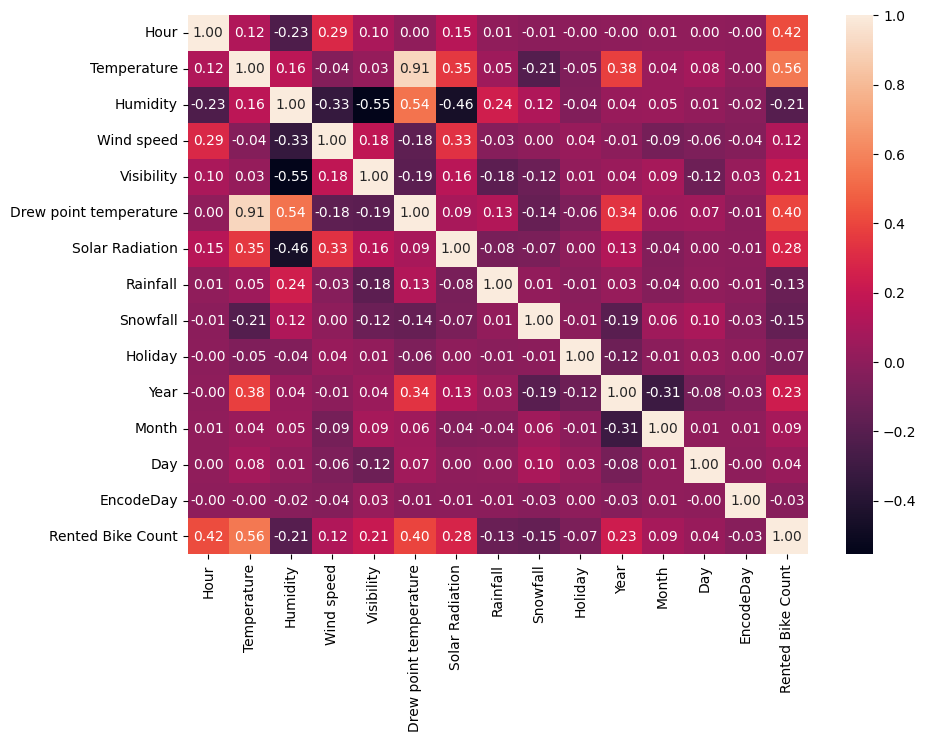

In [ ]:
datanum_train = pd.concat([X_train, y_train],axis = 1)
corr = datanum_train.corr()

plt.figure(figsize= (10,7))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [ ]:
X_train = X_train.drop(columns = ['Drew point temperature'])
X_test = X_test.drop(columns= ['Drew point temperature'])

In [ ]:
def my_modeling_vif2(X, y):

    list_model = [
        LinearRegression(),
        DecisionTreeRegressor(),
        RandomForestRegressor(random_state=42),
        xgb.XGBRegressor(random_state=42)
    ]

    df = pd.DataFrame(columns=['Method', 'MSE', 'RMSE', 'MAE', 'R-squared'])

    for model in list_model:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        method = str(type(model)).split('.')[-1][:-2]

        # Evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        df = df.append({'Method': method,
                        'MSE': mse,
                        'RMSE': rmse,
                        'MAE': mae,
                        'R-squared': r2},
                       ignore_index=True)

    return df

In [ ]:
coba6 = my_modeling_vif2(X, y)
coba6['status'] = 'OHE_S + Handling_date + vif2'
coba6

,Method,MSE,RMSE,MAE,R-squared,status
0,LinearRegression,184686.827194,429.752053,327.994636,0.529564,OHE_S + Handling_date + vif2
1,DecisionTreeRegressor,78994.517425,281.059633,160.683993,0.798784,OHE_S + Handling_date + vif2
2,RandomForestRegressor,43068.630915,207.529831,120.908789,0.890295,OHE_S + Handling_date + vif2
3,XGBRegressor,36124.798556,190.065248,109.518745,0.907983,OHE_S + Handling_date + vif2


### Data Preparation - Power Transformer

In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding = 'cp949')
data = data.rename(columns = {'Temperature(캜)' : 'Temperature',
                          'Humidity(%)' : 'Humidity',
                          'Wind speed (m/s)' : 'Wind speed',
                          'Snowfall (cm)' : 'Snowfall',
                          'Rainfall(mm)' : 'Rainfall',
                          'Dew point temperature(캜)': 'Drew point temperature',
                          'Visibility (10m)' : 'Visibility',
                          'Solar Radiation (MJ/m2)' : 'Solar Radiation'})

In [ ]:
datanum = list(data.select_dtypes(include = ['int64', 'float64']).columns)

In [ ]:
from sklearn.preprocessing import PowerTransformer
sc_X = PowerTransformer(method = 'yeo-johnson')
data[datanum] = sc_X.fit_transform(data[datanum])

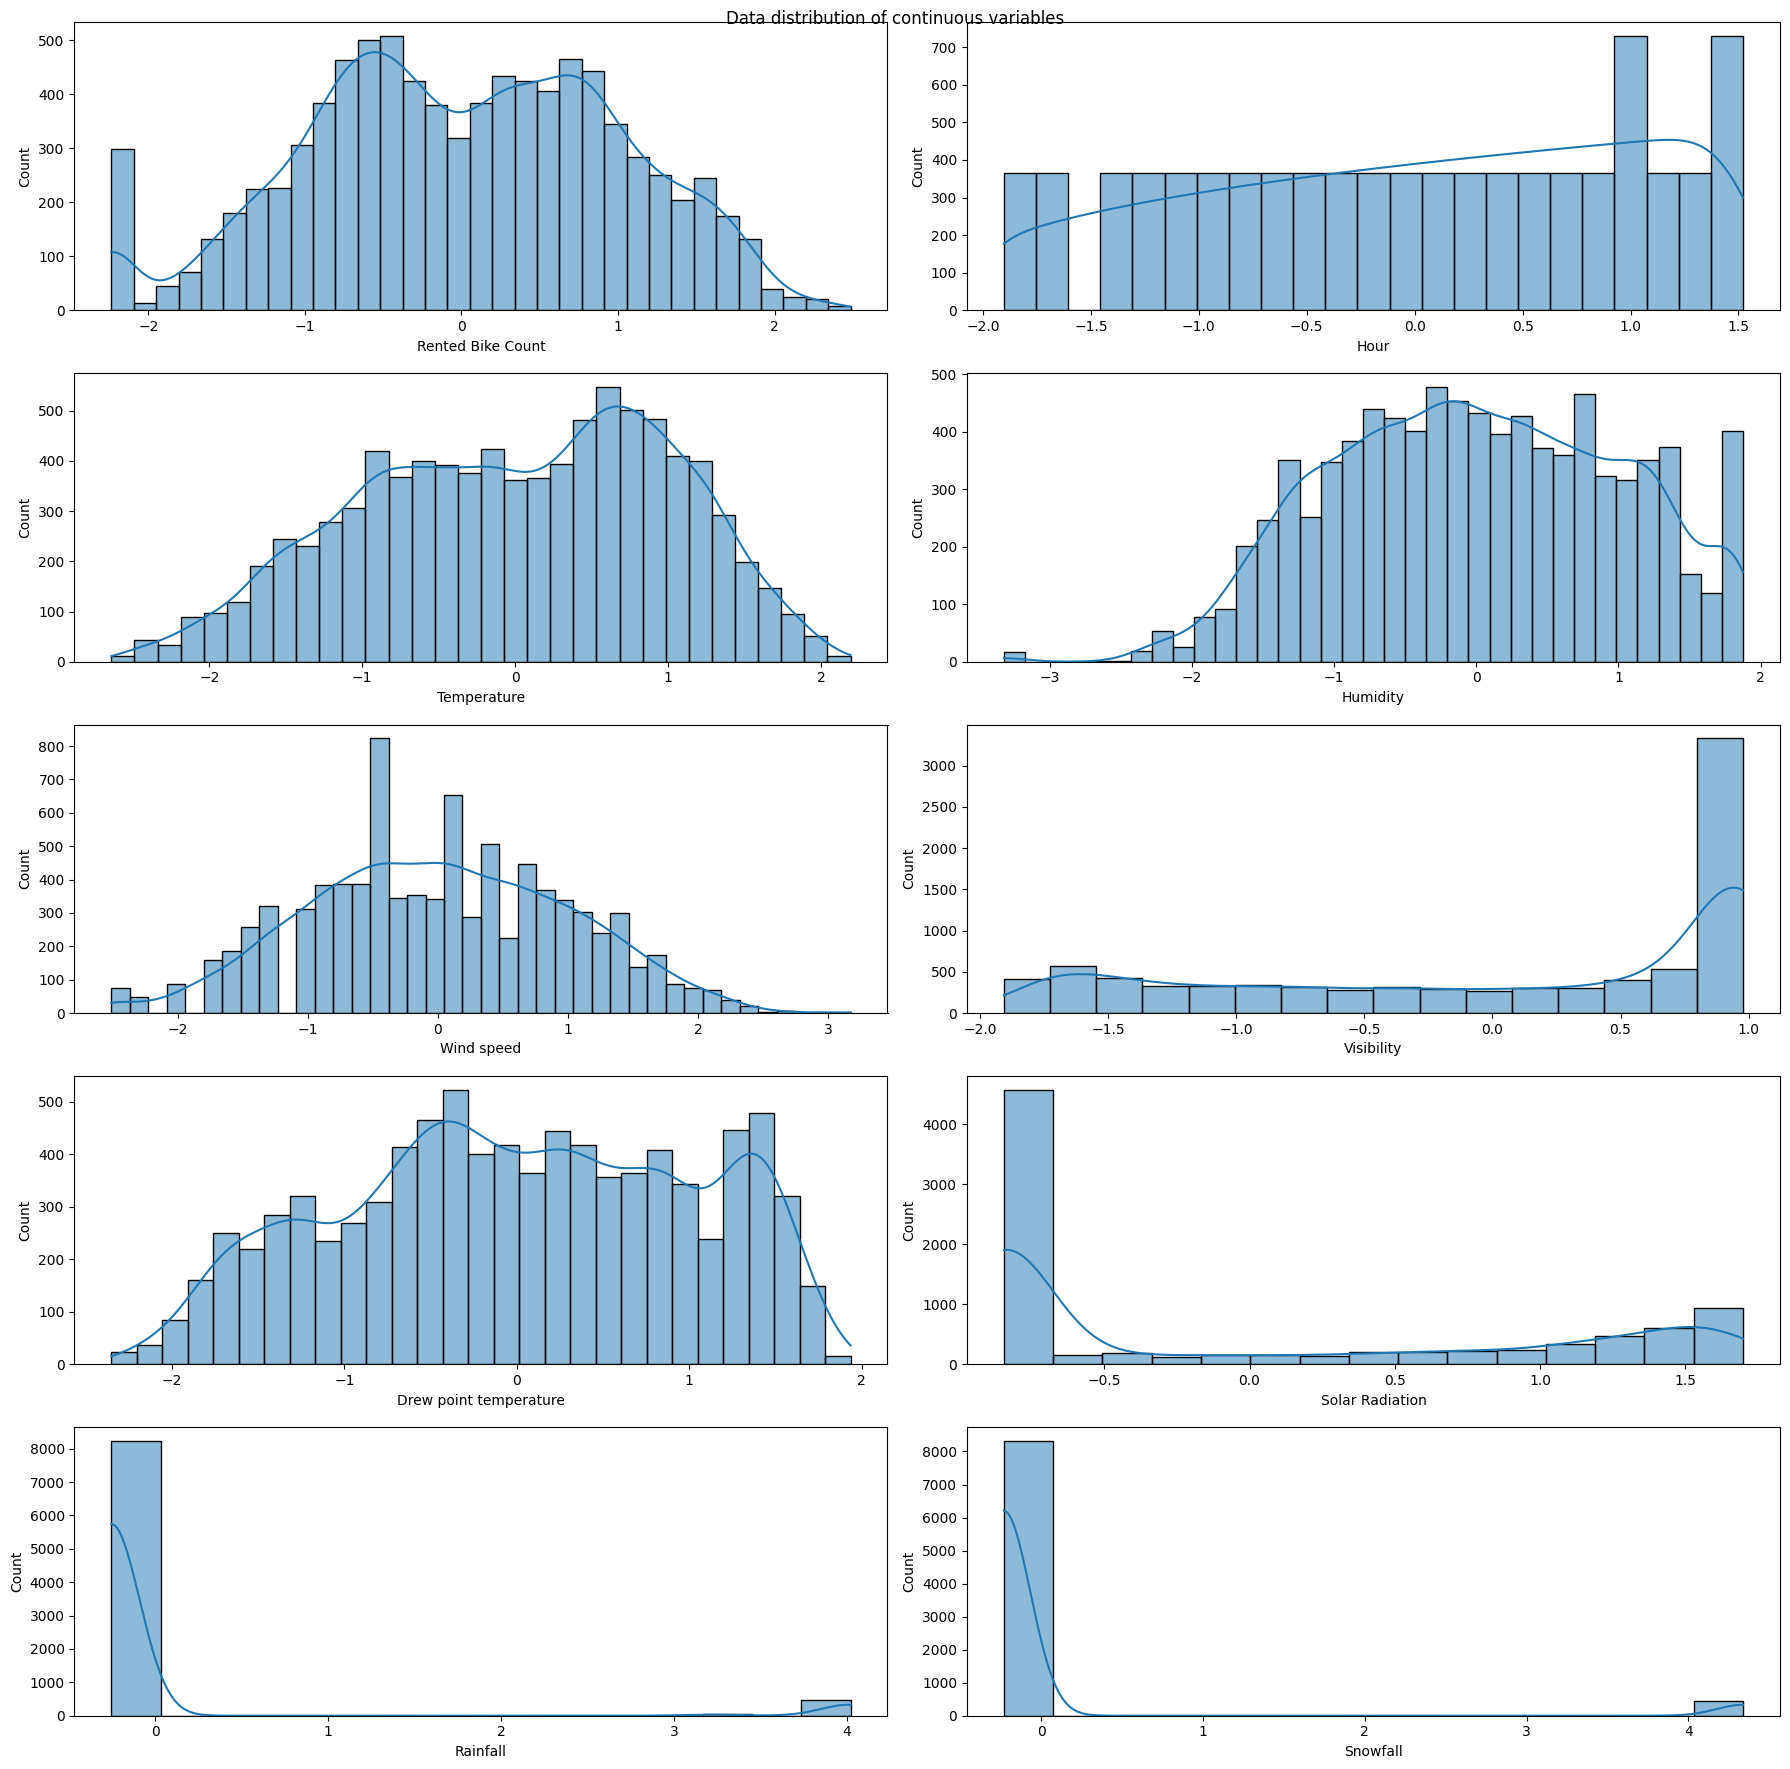

In [ ]:
plt.figure(figsize=(18,18))
for i, col in enumerate(data.select_dtypes(include = ['float64', 'int64']).columns):
  ax = plt.subplot(5,2, i+1)
  sns.histplot(data= data, x = col, ax=ax, kde=True)

plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

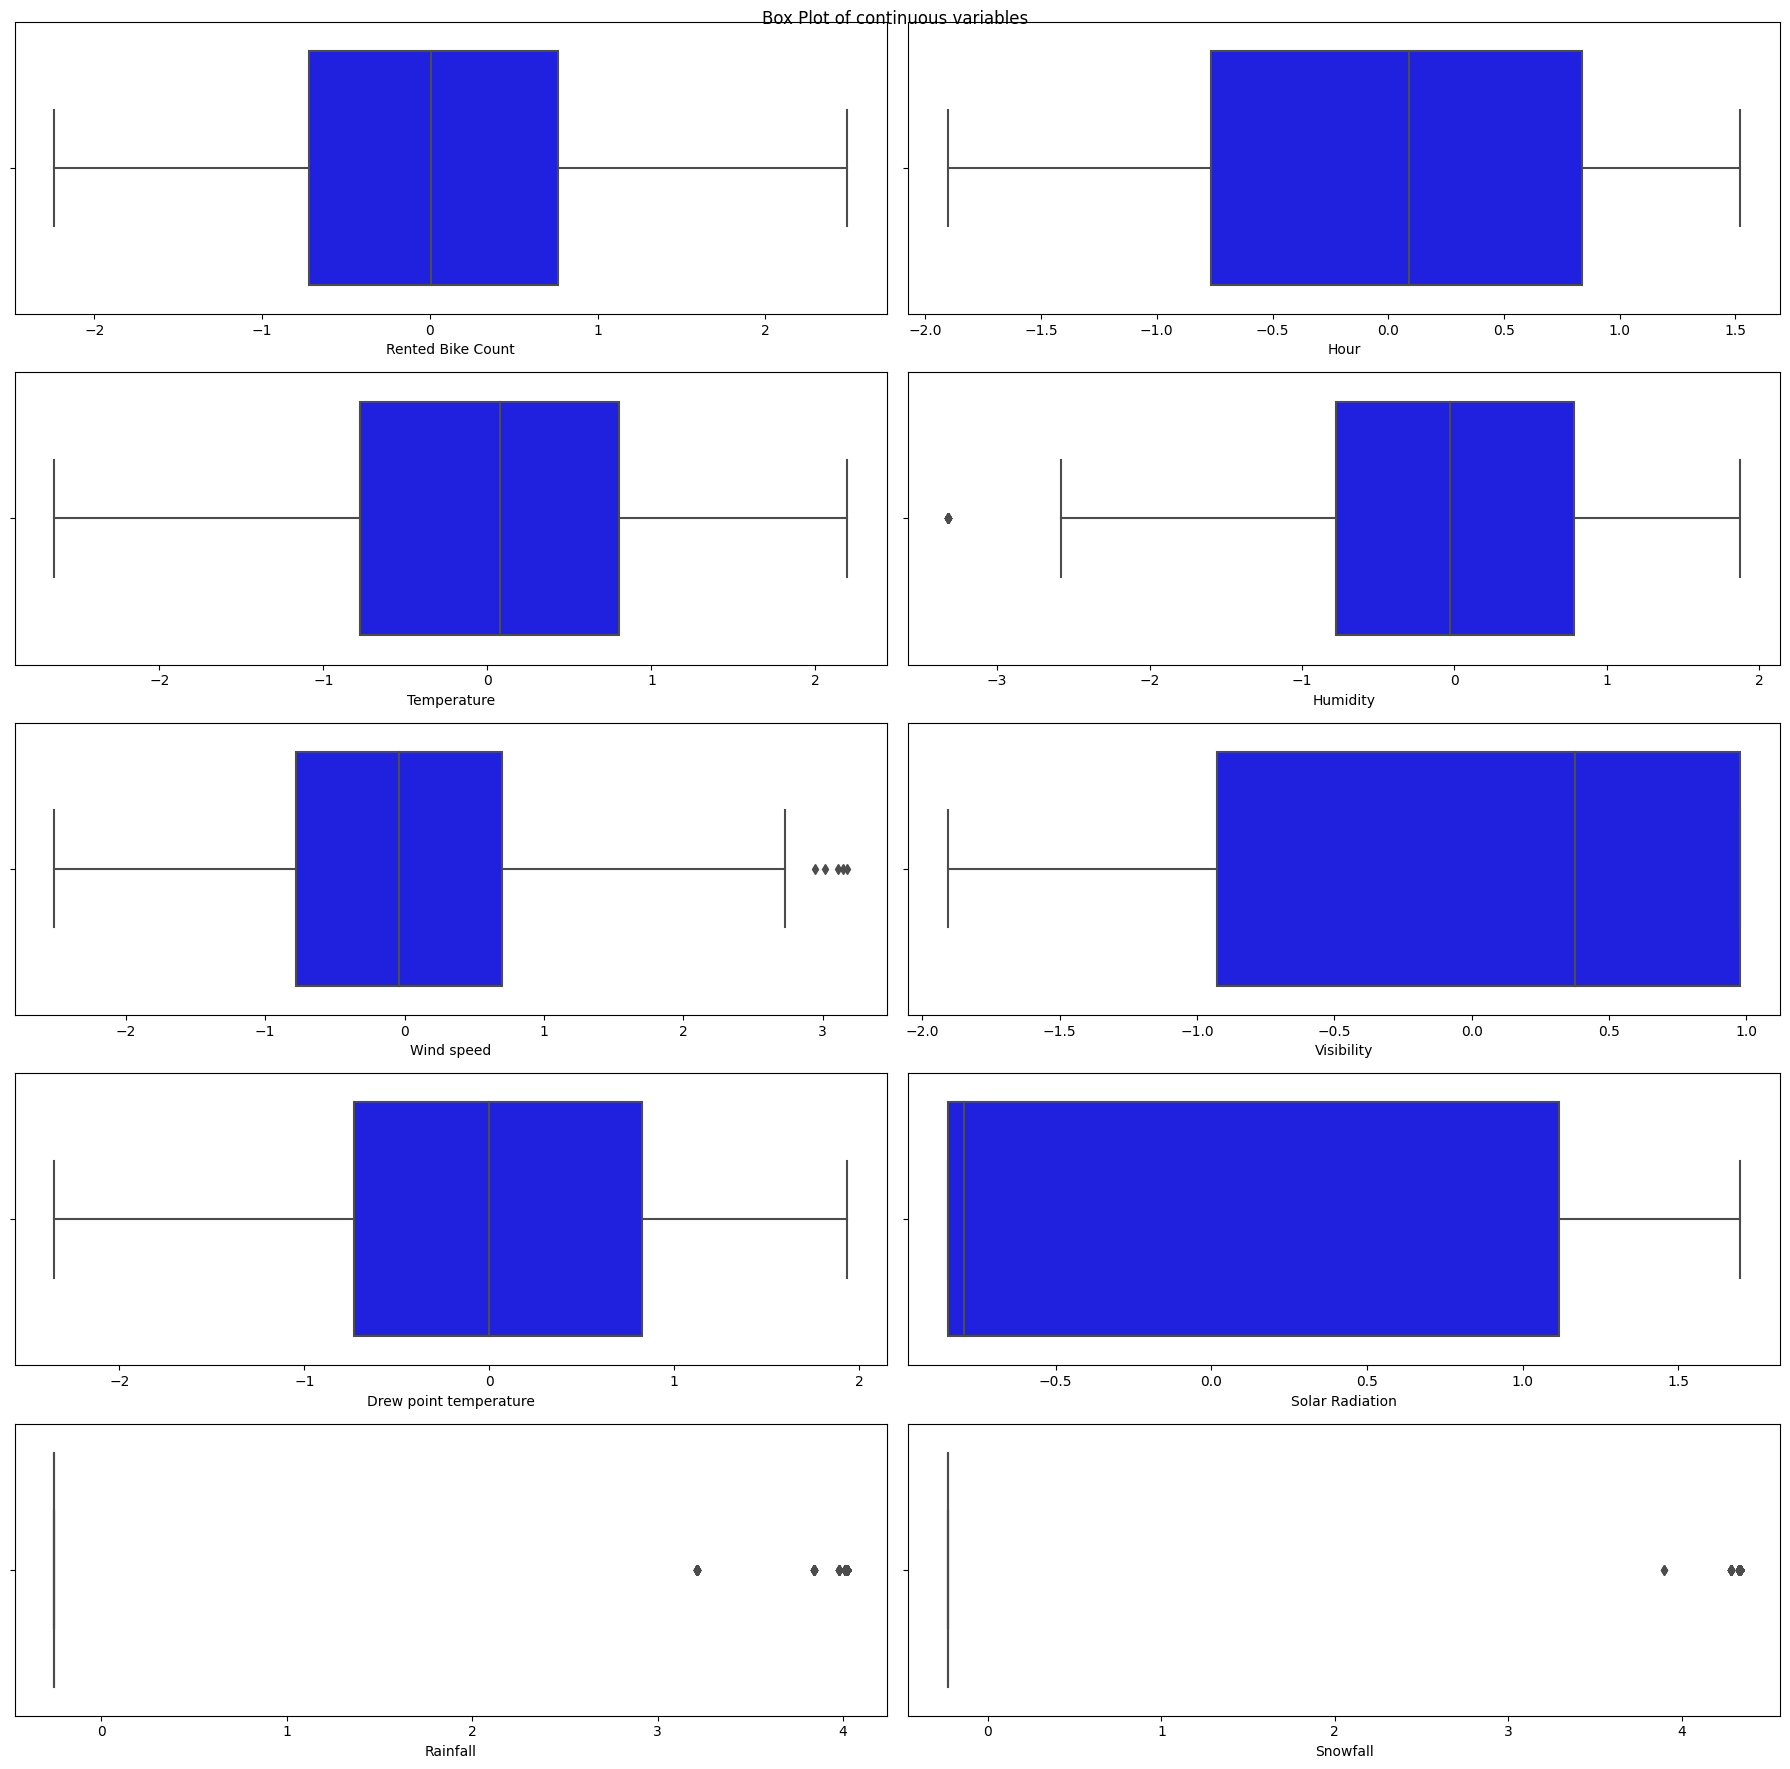

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'White'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=data, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.day_name()


day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
data['EncodeDay'] = data['WeekDay'].map(day_map)

In [ ]:
map_FuntionalDay = {'Yes' : 1, 'No' : 0}
map_Holiday = {'Holiday' : 1, 'No Holiday': 0}

data['Date'] = pd.to_datetime(data['Date'])
data['Functioning Day'] = data['Functioning Day'].map(map_FuntionalDay)
data['Holiday'] = data['Holiday'].map(map_Holiday)


In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
X = datanum.drop(columns = 'Rented Bike Count')
y = datanum [['Rented Bike Count']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_data.columns = ['feature','vifscore']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

MissingDataError: ignored

In [ ]:
datanum_train = pd.concat([X_train, y_train],axis = 1)
corr = datanum_train.corr()

plt.figure(figsize= (10,7))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

In [ ]:
X_train = X_train.drop(columns = ['Drew point temperature'])
X_test = X_test.drop(columns= ['Drew point temperature'])

In [ ]:
coba7 = my_modeling_vif2(X, y)
coba7['status'] = 'OHE_S + Handling_date + vif2 + powertrans'
coba7

In [ ]:
coba6

##### Try to evaluate

In [ ]:
#### copy from chatgpt

evaluation_results = my_modeling_vif2(X, y)

# Print the evaluation results
print(evaluation_results)

# Access specific evaluation metrics
mse_values = evaluation_results['MSE']
rmse_values = evaluation_results['RMSE']
mae_values = evaluation_results['MAE']
r2_values = evaluation_results['R-squared']

# Perform further analysis or comparison of the evaluation metrics
# For example, you can calculate the average or median of the metrics, or compare the models based on the metrics.
average_mse = mse_values.mean()
average_rmse = rmse_values.mean()
average_mae = mae_values.mean()
average_r2 = r2_values.mean()

median_mse = mse_values.median()
median_rmse = rmse_values.median()
median_mae = mae_values.median()
median_r2 = r2_values.median()

# You can also plot or visualize the evaluation metrics to gain insights
# For example, you can create a bar plot to compare the performance of different models based on the metrics.
evaluation_results.plot(x='Method', y=['MSE', 'RMSE', 'MAE', 'R-squared'], kind='bar')
plt.title('Model Evaluation Metrics')
plt.xlabel('Method')
plt.ylabel('Metric Value')
plt.gca().set_facecolor('white')
plt.show()


## Final

In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding='cp949')

In [ ]:
data = data.rename(columns = {'Temperature(캜)' : 'Temperature',
                          'Humidity(%)' : 'Humidity',
                          'Wind speed (m/s)' : 'Wind speed',
                          'Snowfall (cm)' : 'Snowfall',
                          'Rainfall(mm)' : 'Rainfall',
                          'Dew point temperature(캜)': 'Drew point temperature',
                          'Visibility (10m)' : 'Visibility',
                          'Solar Radiation (MJ/m2)' : 'Solar Radiation'})

In [ ]:
datanum = list(data.select_dtypes(include = ['int64', 'float64']).columns)

In [ ]:
sc_X = PowerTransformer(method = 'yeo-johnson')
data[datanum] = sc_X.fit_transform(data[datanum])

In [ ]:
data = data.drop('Seasons', axis = 1)
data = pd.concat([data, OHE_seasons], axis = 1)
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekDay'] = data['Date'].dt.day_name()


day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
data['EncodeDay'] = data['WeekDay'].map(day_map)

In [ ]:
map_FuntionalDay = {'Yes' : 1, 'No' : 0}
map_Holiday = {'Holiday' : 1, 'No Holiday': 0}

data['Date'] = pd.to_datetime(data['Date'])
data['Functioning Day'] = data['Functioning Day'].map(map_FuntionalDay)
data['Holiday'] = data['Holiday'].map(map_Holiday)

In [ ]:
datanum = data.select_dtypes(include = ['int64', 'float64'])
X = datanum.drop(columns = 'Rented Bike Count')
y = datanum [['Rented Bike Count']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
datanum

In [ ]:
X = add_constant(X_train)
vif_data = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()

vif_data.columns = ['feature','vifscore']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

In [ ]:
X_train = X_train.drop(columns = ['Drew point temperature'])
X_test = X_test.drop(columns= ['Drew point temperature'])

### Cross Validation and Tunning Params

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_regressor = xgb.XGBRegressor(random_state=42)
parameters = {
    'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

grid_cv = GridSearchCV(xgb_regressor, parameters, cv=5, scoring ='neg_root_mean_squared_error')
grid_cv.fit(X_train, y_train)

In [ ]:
important_cols = ['params', 'mean_test_score', 'rank_test_score']

cv_result = pd.DataFrame(grid_cv.cv_results_)
cv_result[important_cols]

In [ ]:
best_xgb_model = grid_cv.best_estimator_

In [ ]:
y_pred = best_xgb_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
evaluation = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Value': [mse, rmse, mae, r2]
})

evaluation